# Prétraiter son corpus

## Classes déséquilibrées

In [1]:
import pandas as pd

data = pd.read_csv('data/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


On voit clairement ci-dessous que les 6 classes ne sont pas équilibrées: La majorité des données sont contenues dans les classes 1 et 2, suivi de 7, 3, 5, 6

<AxesSubplot:>

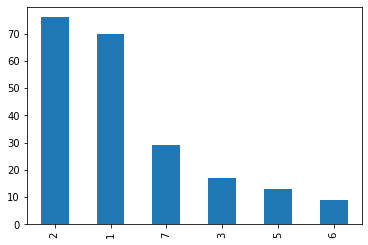

In [2]:
data['Class'].value_counts().plot.bar()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)

lr = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5740740740740741

On voit ci-dessus que l'on a à peine 62% de précision: l'entraînement ne s'est donc pas bien passé. Bien que ça n'explique pas tout, le fait d'avoir des classes déséquilibrées jouent en grande partie sur le résultat. Il faut donc en priorité résoudre ce problème.

Idéalement, pour réequilibrer les classes, ils faut rajouter des données appartenant aux classes lacunaires. Cependant, les données que vous aurez seront en général les seules que vous aurez pu obtenir. Il sera donc difficile de rajouter de nouvelles données. Il faut donc agir au niveau des données que l'on a. Pour cela, nous avons deux options: l'``Under-sampling`` et l'``Over-sampling``

En travaillant avec ``scikit-learn``, vous pouvez utiliser la librairie ``imblearn``, qui implémente ces différentes méthodes:

In [4]:
!pip3 install imblearn

     |████████████████████████████████| 189 kB 514 kB/s eta 0:00:01


In [4]:
X.shape, y.shape

((214, 9), (214, 1))

In [4]:
import imblearn

## Under-sampling

La méthode la plus simple est de réduire le nombre de données à la plus petite classe. On s'assure ainsi d'avoir des classes équilibrées sans en créer de nouvelles. On parle alors d'``Under-sampling``. Il existe plusieurs méthodes d'Under-sampling, la plus simple étant la méthode aléatoire:

In [5]:
from imblearn.under_sampling import RandomUnderSampler
randomsampler = RandomUnderSampler(random_state=42) # random_state permet de s'assurer que les données seront toujours mélangées de la même manière
under_X, under_y = randomsampler.fit_resample(X, y)
print('Nouvelle forme des données: ', under_X.shape, under_y.shape)

Nouvelle forme des données:  (54, 9) (54, 1)


<AxesSubplot:>

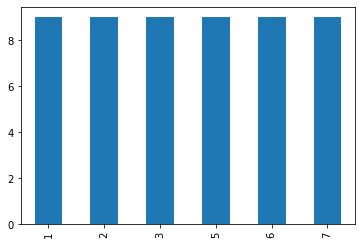

In [6]:
under_y['Class'].value_counts().plot.bar()

In [7]:
lr = lr.fit(under_X, under_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5185185185185185

Une autre méthode proposée par ``imblearn`` est d'utiliser un algorithme KNN pour réduire le nombre de samples. Il existe plusieurs variations de cette méthode, mais de manière générale, l'algorithme supprime tout point qui ne fait pas partie de la même classe que celle de la majorité des voisins:

Nouvelle forme des données:  (111, 9) (111, 1)


<AxesSubplot:>

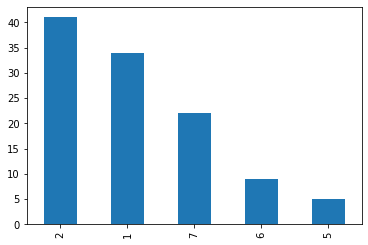

In [8]:
from imblearn.under_sampling import EditedNearestNeighbours
nn_undersampler = EditedNearestNeighbours()
under_X, under_y = nn_undersampler.fit_resample(X, y)
print('Nouvelle forme des données: ', under_X.shape, under_y.shape)
under_y['Class'].value_counts().plot.bar()

In [9]:
lr = lr.fit(under_X, under_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5555555555555556

## Over-sampling

On peut également créer des données factices. Celles-ci ressembleront aux données déjà existantes sans être exactement les mêmes. Il existe pour cela différentes méthodes et algorithmes. On parle d'``Over-sampling``.

Comme pour l'``Under-sampling``, la méthode la plus simple est de sélectionner aléatoirement des points de données et de les copier. Attention: simplement copier-coller les données de telle sorte à compléter les classes lacunaires n'est pas une solution. En effet, la qualité de l'algorithme dépend de la quantité et de la variété des données. Copier-coller les données ne ferait que rajouter des données que l'algorithme aura déjà vues:

Nouvelle forme des données:  (456, 9) (456, 1)


<AxesSubplot:>

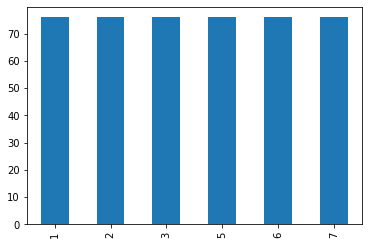

In [10]:
from imblearn.over_sampling import RandomOverSampler
randomoversampler = RandomOverSampler(random_state = 42)
over_X, over_y = randomoversampler.fit_resample(X,y)
print('Nouvelle forme des données: ', over_X.shape, over_y.shape)
over_y['Class'].value_counts().plot.bar()

In [11]:
lr = lr.fit(over_X, over_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5740740740740741

### SMOTE

Au lieu de copier aléatoirement des points de données comme dans la méthode précédente, ``SMOTE`` génère de nouveaux points de données à partir d'un algorithme de type KNN:

Nouvelle forme des données:  (456, 9) (456, 1)


<AxesSubplot:>

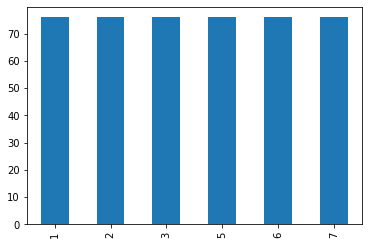

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
over_X, over_y = smote.fit_resample(X,y)
print('Nouvelle forme des données: ', over_X.shape, over_y.shape)
over_y['Class'].value_counts().plot.bar()

In [13]:
lr = lr.fit(over_X, over_y)
lr.score(X_test, y_test)

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5925925925925926

## spaCy

``spaCy`` est une librairie dédiée au NLP. A la différence de NLTK, qui est plus ancien et plus orienté recherches, spaCy est plutôt orienté vers l'industrie. Bien qu'étant une librairie Python, l'essentiel du code de spaCy est écrit en C. Cela lui permet de traiter les données bien plus rapidement qu'avec du Python pur. 

spaCy permet de traiter une dizaine de langues dont l'anglais, le français, l'allemand, l'espagnol et l'italien. D'autres langues sont ajoutées au fur et à mesure. Contrairement à NLTK, ces traitements sont possibles grâce à au Deep Learning. Ces différents modèles sont appelés des modèles de langues.

spaCy propose pour chaque langue qu'il traite l'ensemble des traitements de NLP, à savoir:
* annotation des parties du discours (POS tagging)
* analyse des dépendances
* reconnaissance des entités nommées (Named Entity)
* tokenization
* lemmatization
* calcul de similarité
* word embbeddings
* ...


In [15]:
!pip3 install spacy

     |████████████████████████████████| 6.3 MB 1.9 MB/s eta 0:00:01
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
     |████████████████████████████████| 42 kB 757 kB/s eta 0:00:01
     |████████████████████████████████| 615 kB 789 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 121 kB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 668 kB/s eta 0:00:01
     |████████████████████████████████| 452 kB 205 kB/s eta 0:00:01
     |████████████████████████████████| 106 kB 745 kB/s eta 0:00:01
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


In [16]:
import spacy

Chaque modèle de langue est proposé en trois versions: petite (sm), moyenne (md), et grande (lg). Plus un modèle sera grand et plus les analyses seront performantes. Cependant, plus le modèle est grand et plus celui-ci prend de la place sur le disque et en mémoire.

Ces modèles doivent être installés via la ligne de commande avant de pouvoir être utilisés.

In [17]:
# installation du plus petit modele anglais
!python3 -m spacy download en_core_web_sm

# installation du plus petit modele francais
# !python3 -m spacy download fr_core_news_sm  

     |████████████████████████████████| 13.9 MB 451 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
# on charge un modèle à l'aide de la fonction load
# vous devrez sans doute redémarrer le kernel du notebook pour que cette ligne fonctionne
nlp = spacy.load('en_core_web_sm')
# nlp = spacy.load('fr_core_news_sm ')

Le modèle est maintenant chargé dans la variable ``nlp``. C'est avec elle que tous les traitements vont se faire. Par défaut, le modèle va appliquer tous les traitements au corpus.

In [19]:
# ci-dessous, on analyse une seule phrase
sentence = 'I love Apple phones'
doc = nlp(sentence) # on donne le texte en argument directement au modele, on ne passe pas par de fonctions

La variable ``doc`` contient tous les tokens de la phrase. Ces tokens possèdent plusieurs propriétés, notamment:
* text : forme textuelle du token
* lemma_ : le lemme du token
* pos_ : la partie du discours large du token (ex: NOM)
* tag_ : la partie du discours fine du token (ex: NOM SINGULIER)
* dep_ : le rôle syntaxique du token
* is_stop : si le mot est un stopwords
* et beaucoup d'autres


In [28]:
# de base, si on boucle sur doc, on parcourt les tokens de ce doc
for token in doc:
    print('TEXT :', token.text)
    print('LEMMA :', token.lemma_)
    print('LEMMA 2 :', token.lemma)
    print('POS :', token.pos_)
    print('POS 2:', token.pos)

    print('TAG :', token.tag_)
    print('DEP :', token.dep_)
    print('IS STOP :', token.is_stop)
    print()

TEXT : I
LEMMA : I
LEMMA 2 : 4690420944186131903
POS : PRON
POS 2: 95
TAG : PRP
DEP : nsubj
IS STOP : True

TEXT : love
LEMMA : love
LEMMA 2 : 3702023516439754181
POS : VERB
POS 2: 100
TAG : VBP
DEP : ROOT
IS STOP : False

TEXT : Apple
LEMMA : Apple
LEMMA 2 : 6418411030699964375
POS : PROPN
POS 2: 96
TAG : NNP
DEP : compound
IS STOP : False

TEXT : phones
LEMMA : phone
LEMMA 2 : 15861065479537671914
POS : NOUN
POS 2: 92
TAG : NNS
DEP : dobj
IS STOP : False



On peut également accéder à d'autres unités plus larges que le token, par exemple les groupes nominaux (noun chunks) ou les entités nommées:

In [29]:
for chunk in doc.noun_chunks:
    print('TEXT :', chunk.text)
    print('LEMMA :', chunk.lemma_)
    print()

TEXT : I
LEMMA : I

TEXT : Apple phones
LEMMA : Apple phone



In [27]:
for ent in doc.ents:
    print('TEXT :', ent.text)
    print('CATEGORIE :', ent.label_)
    print()

TEXT : Apple
CATEGORIE : ORG



## Visualiser les analyses de spaCy

``spaCy`` propose l'outil ``displacy`` pour visualiser l'analyse de dépendances ainsi que les entités nommées. Le paramètres ``style`` prend "dep" en argument pour l'analyse de dépendances et "ent" pour les entités nommées.

In [30]:
from spacy import displacy
doc = nlp('In the Land of Mordor where the shadows lie.')
displacy.render(doc, style='dep')

In [31]:
displacy.render(doc, style='ent')

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


## Prétraiter un corpus avec spaCy

In [32]:
corpus = [ "Three rings for the Elven-kings under the sky,",
"Seven for the Dwarf-lords in their halls of stone,",
"Nine for mortal men doomed to die,",
"One for the Dark Lord on his dark throne;",
"In the Land of Mordor where the shadows lie.",
"One ring to rule them all, one ring to find them,",
"One ring to bring them all, and in the darkness bind them;",
"In the Land of Mordor where the shadows lie."]

Pour traiter un ensemble de documents, on utilise la fonction ``pipe``. La variable ``docs`` contiendra alors une liste de documents, qui contiendront leurs analyses respectives. Il faut ainsi boucler deux fois: une première fois sur les documents, et une seconde fois sur les tokens.

In [39]:
docs = nlp.pipe(corpus)

In [42]:
docs = nlp.pipe(corpus)

for doc in docs:
    print("Doc :", doc.text)
    for token in doc:
        print("-- Token :", token.text)

Doc : Three rings for the Elven-kings under the sky,
-- Token : Three
-- Token : rings
-- Token : for
-- Token : the
-- Token : Elven
-- Token : -
-- Token : kings
-- Token : under
-- Token : the
-- Token : sky
-- Token : ,
Doc : Seven for the Dwarf-lords in their halls of stone,
-- Token : Seven
-- Token : for
-- Token : the
-- Token : Dwarf
-- Token : -
-- Token : lords
-- Token : in
-- Token : their
-- Token : halls
-- Token : of
-- Token : stone
-- Token : ,
Doc : Nine for mortal men doomed to die,
-- Token : Nine
-- Token : for
-- Token : mortal
-- Token : men
-- Token : doomed
-- Token : to
-- Token : die
-- Token : ,
Doc : One for the Dark Lord on his dark throne;
-- Token : One
-- Token : for
-- Token : the
-- Token : Dark
-- Token : Lord
-- Token : on
-- Token : his
-- Token : dark
-- Token : throne
-- Token : ;
Doc : In the Land of Mordor where the shadows lie.
-- Token : In
-- Token : the
-- Token : Land
-- Token : of
-- Token : Mordor
-- Token : where
-- Token : the
-- Toke

In [43]:
docs = nlp.pipe(corpus)
for doc in docs:
    print("Doc :", doc.text)
    for token in doc:
        if token.is_stop:
            pass
        elif token.is_punct:
            pass
        else:
            print("-- Token :", token.lemma_)

Doc : Three rings for the Elven-kings under the sky,
-- Token : ring
-- Token : Elven
-- Token : king
-- Token : sky
Doc : Seven for the Dwarf-lords in their halls of stone,
-- Token : seven
-- Token : dwarf
-- Token : lord
-- Token : hall
-- Token : stone
Doc : Nine for mortal men doomed to die,
-- Token : mortal
-- Token : man
-- Token : doom
-- Token : die
Doc : One for the Dark Lord on his dark throne;
-- Token : Dark
-- Token : Lord
-- Token : dark
-- Token : throne
Doc : In the Land of Mordor where the shadows lie.
-- Token : Land
-- Token : Mordor
-- Token : shadow
-- Token : lie
Doc : One ring to rule them all, one ring to find them,
-- Token : ring
-- Token : rule
-- Token : ring
-- Token : find
Doc : One ring to bring them all, and in the darkness bind them;
-- Token : ring
-- Token : bring
-- Token : darkness
-- Token : bind
Doc : In the Land of Mordor where the shadows lie.
-- Token : Land
-- Token : Mordor
-- Token : shadow
-- Token : lie


In [44]:
docs = nlp.pipe(corpus)
new_corpus = [] # creer nouvelle liste qui servir de corpus tokenizé
for doc in docs:
    filtered_doc = [] # doc tokenizé
    for token in doc:
        if token.is_stop:
            pass
        elif token.is_punct:
            pass
        else:
            filtered_doc.append(token.lemma_) # si token est bon, on l'ajoute a la liste
            
    new_corpus.append(filtered_doc) # on ajoute le doc tokenizé au nouveau corpus

In [45]:
for doc in new_corpus:
    print(doc)

['ring', 'Elven', 'king', 'sky']
['seven', 'dwarf', 'lord', 'hall', 'stone']
['mortal', 'man', 'doom', 'die']
['Dark', 'Lord', 'dark', 'throne']
['Land', 'Mordor', 'shadow', 'lie']
['ring', 'rule', 'ring', 'find']
['ring', 'bring', 'darkness', 'bind']
['Land', 'Mordor', 'shadow', 'lie']


In [50]:
from gensim.corpora import Dictionary

# Dictionary constitue notre vocabulaire, associe un id a chaque token
# ainsi que différentes statistiques sur les documents du corpus
dictionary = Dictionary(new_corpus)

In [51]:
vec_corpus = [dictionary.doc2bow(doc) for doc in new_corpus]

In [52]:

from gensim.models.ldamodel import LdaModel
NUM_TOPICS = 2
lda = LdaModel(corpus=vec_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [53]:
lda.print_topics()

[(0,
  '0.079*"ring" + 0.054*"bind" + 0.054*"darkness" + 0.054*"bring" + 0.047*"Dark" + 0.044*"throne" + 0.043*"dark" + 0.043*"lord" + 0.041*"hall" + 0.041*"stone"'),
 (1,
  '0.089*"ring" + 0.068*"shadow" + 0.064*"lie" + 0.064*"Mordor" + 0.063*"Land" + 0.041*"king" + 0.041*"man" + 0.041*"sky" + 0.040*"doom" + 0.040*"Elven"')]

### Références:

* Under-sampling:
    * https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html
* Over-sampling:
    * https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
* Spacy:
    * https://spacy.io/ 
    * Modèles de langues: https://spacy.io/usage/models
    * Token : https://spacy.io/api/token
    * Tutoriel : https://spacy.io/usage/spacy-101
    * Documentation : https://spacy.io/api
    
    
